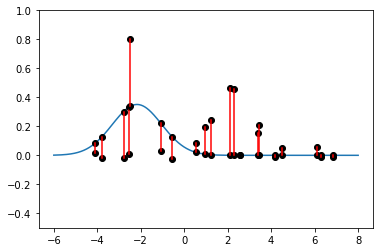

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Load data from fitdata.csv
data = np.genfromtxt('activity_data2.csv', delimiter=',')
x = data[0, :]
y = data[1, :]
n = x.size

# Plot the data
plt.plot(x, y, 'ko')

# RMS Error
def rms_error(mu: float, sigma2: float, x, y):
    f = lambda x : (1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2)))
    return np.sqrt((1/n) * np.sum((f(x) - y)**2))

# RMS wrapper
rms_wrapper = lambda coeffs : rms_error(coeffs[0], coeffs[1], x, y)

coeff_min_rms = scipy.optimize.minimize(rms_wrapper, np.array([2, 0.8]), method='Nelder-Mead')

# RMS fit
mu = coeff_min_rms.x[0]
sigma2 = coeff_min_rms.x[1]
f = lambda x : (1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2)))

# Average error
def average_error(mu: float, sigma2: float, x, y):
    f = lambda x : (1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2)))
    return (1/n) * np.sum(np.abs((f(x) - y)))

# Average wrapper
average_wrapper = lambda coeffs : average_error(coeffs[0], coeffs[1], x, y)

coeff_min_average = scipy.optimize.minimize(average_wrapper, np.array([2, 0.8]), method='Nelder-Mead')

# Average fit
mu = coeff_min_average.x[0]
sigma2 = coeff_min_average.x[1]
f = lambda x : (1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2)))

# Max error
def max_error(mu: float, sigma2: float, x, y):
    f = lambda x : (1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2)))
    return np.max(np.abs((f(x) - y)))

# Max wrapper
max_wrapper = lambda coeffs : max_error(coeffs[0], coeffs[1], x, y)

coeff_min_max = scipy.optimize.minimize(max_wrapper, np.array([2, 0.8]), method='Nelder-Mead')

# Max fit
mu = coeff_min_max.x[0]
sigma2 = coeff_min_max.x[1]
f = lambda x : (1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2)))

# Plot the function
xplot = np.linspace(-6, 8, 1000)
yplot = f(xplot)
plt.plot(xplot, yplot)

for k in range(n):
    xdata = x[k]
    ydata = y[k]
    yhat = f(xdata)

    # Plot a point at the predicted value
    plt.plot(xdata, yhat, 'ko')
    # Plot a red line between the data point and the predicted value
    plt.plot([xdata, xdata], [ydata, yhat], 'r')

# Choose a reasonable scale for the y-axis
plt.ylim([-0.5, 1])
plt.show()